In [1]:
import numpy as np
from numpy import polyfit as polyfit
import matplotlib.pyplot as plt
import math as math 
from scipy.optimize import curve_fit
from scipy.stats import chisquare

In [2]:
num_data_pts = 20
#choose the coefficients of a polynomial with degree 10 at random
#need 11 coeff for polynomial deg 10 
coeff_K_10 = [np.random.uniform(-1,1)*.0001 for _ in range(11)]
print(coeff_K_10)

[4.284674746417587e-05, -5.443309529151281e-05, -1.103413149803194e-05, 2.6834020608003152e-05, -3.405357156736919e-05, 2.8319038044265032e-05, 6.03385371003766e-05, 6.006253871608383e-05, 9.374682042625129e-05, 6.988782363990556e-05, -7.47983119060018e-05]


Need to generate 20 points in the range -5 < x < 5 according to $y_{n} = f(x_{n}) + \eta_{n}$. Saying tha thte noise has a standard deviation of 1/10 of the overall dynamic range of f(x)?? The dynamic rang of f(x) in -5 < x <5 is measured by its variance over the interval. 

[-4.35047686 -3.79018835 -3.62464285 -2.66664081 -2.47006781 -2.33382997
 -2.12132323 -1.77031393 -1.15630535  1.11214258  1.50104877  1.87756861
  2.40215312  2.54585146  3.02097147  3.27379158  3.58545649  3.86620096
  4.7818499   4.8670299 ]


Text(0,0.5,'$f(x_{n})$')

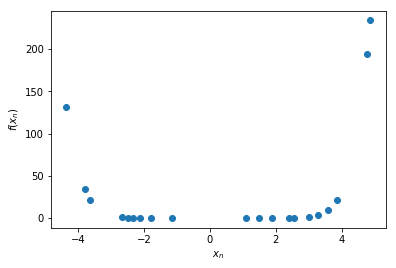

In [3]:
#need 20 data points in the range -5 < x < 5 
x_vals = [np.random.uniform(-5,5) for _ in range(20)]
x_vals = np.sort(x_vals)
print(x_vals)
fx_vals = np.polyval(coeff_K_10,x_vals)
plt.scatter(x_vals,fx_vals)
plt.xlabel('$x_{n}$')
plt.ylabel('$f(x_{n})$')

In [4]:
#need to add some noise to the y. 
#first we need the variance of f(x) and wil take 1/10 of that to get noise variance
var_fx = np.var(fx_vals)
var_noise = var_fx * (0.1)
dynamic_range = abs(max(fx_vals)/min(fx_vals))
print(dynamic_range)
print(var_fx)

1957030.409636202
4546.31407210546


In [5]:
y_vals = [(fx_vals[i] + np.random.normal(loc=0,scale=np.sqrt(var_noise))) for i in range(len(fx_vals))]

Text(0,0.5,'$f(x_{n}) + \\eta_{n}$')

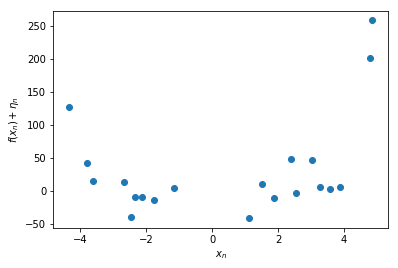

In [6]:
plt.scatter(x_vals,y_vals)
plt.xlabel('$x_{n}$')
plt.ylabel('$f(x_{n}) + \eta_{n}$')

In [9]:
#first need to write code length definition 
#I think P(x) should be the distribution that I drew x from so 1/10 for unif dist between -5 and 5
#sigma**2 is the variance of y = var_noise

#we need chi_square_min according to the problem; should this be calculated differently?
def calc_chi_square(y_n,f_x,sigma_2):
    #sigma here is the variance of the noise
    chi_square = (1/sigma_2)*np.sum((y_n-f_x)**2)
    
    return chi_square


def code_length(N,K,y_n,f_x,sigma_2):
    #f_x should be the predicted values, depending on K?
    log_prob = N*np.log((1/10)) + 0.5*calc_chi_square(y_n,f_x,sigma_2) + (N/2)*np.log(2*np.pi*var_noise)+(K/2)*np.log(N)
    
    return log_prob

Now going to try to fit polynomials of degree K and find value of K that minimizes code length in equation 6.296

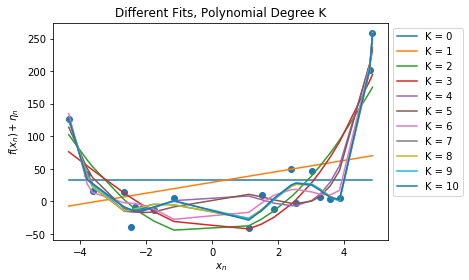

In [10]:
K_list = []
for K_val in range(11):
    K_list.append(K_val)
def plot_fits_K(N,x_in,y_in):
    code_length_list = []
    chi_square_list = []
    
    plt.scatter(x_in,y_in)
    plt.xlabel('$x_{n}$')
    plt.ylabel('$f(x_{n}) + \eta_{n}$')
    for K_val in range(11):
        p_K= np.polyfit(x_in,y_in,K_val)
        f_x_K = np.polyval(p_K,x_in)
        #it's this calculated f_X that goes into chi square bc we're trying to find out which param best fit
        code_length_list.append(code_length(N,K_val,y_in,f_x_K,var_noise))
        chi_square_list.append(calc_chi_square(y_in,f_x_K,var_noise))
        plt.plot(x_in,f_x_K,label = 'K = '+str(K_val))
    plt.legend(bbox_to_anchor=(1, 1))
    plt.title('Different Fits, Polynomial Degree K')
    
    return code_length_list,chi_square_list
code_len, chi_list = plot_fits_K(20,x_vals,y_vals)

Text(0,0.5,'Code Length')

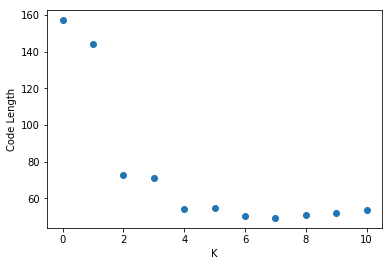

In [11]:
plt.scatter(K_list,code_len)
plt.xlabel('K')
plt.ylabel('Code Length')

Text(0,0.5,'Chi Squared')

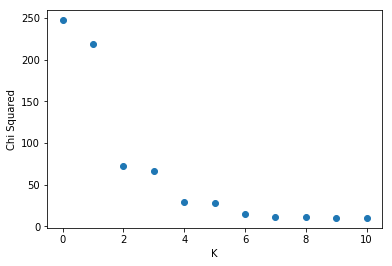

In [12]:
plt.scatter(K_list,chi_list)
plt.xlabel('K')
plt.ylabel('Chi Squared')

It does appear that higher order polynomials always give better fits in the sense of smaller chi-squared. 

$\chi^{2}$ is a function  of K and N, but also of particular points {${x_{i},y_{i}}$} that we "observed" in the experiment and fo the particular parameters {$a_{\mu}$} that specify the real function you are trying to learn. When you choose a different set of parameters and test points {$x_{i}$}, from the same distribution, how different is the minimum energy per data point $\epsilon = \chi^{2}_{min}/N$ as a function of K?

Text(0,0.5,'$\\epsilon$')

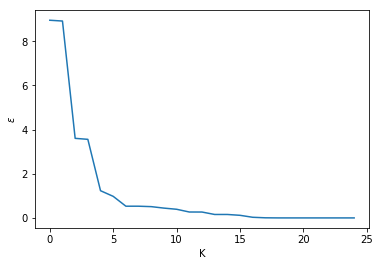

In [15]:
K_list_new = []
for K_val in range(25):
    K_list_new.append(K_val)
import warnings
warnings.filterwarnings("ignore")
def min_energy_vs_K(N):
    #going to run this function 500 times, so each time we want to choose different parameters and test points 
    #starting K is still 10
    code_length_list = []
    chi_square_list = []
    epsilon_list = []
    
    coeff_K_10_new = [np.random.uniform(-1,1)*.0001 for _ in range(11)]
    x_vals_new = [np.random.uniform(-5,5) for _ in range(N)]
    x_vals_new = np.sort(x_vals_new)
    fx_vals_new = np.polyval(coeff_K_10_new,x_vals_new)
    var_noise_new = np.var(fx_vals_new) *(0.1)
    y_vals_new = [(fx_vals_new[i] + np.random.normal(loc=0,scale=np.sqrt(var_noise_new))) for i in range(len(fx_vals_new))]
    for K_val in range(25):
        p_K= np.polyfit(x_vals_new,y_vals_new,K_val)
        f_x_K = np.polyval(p_K,x_vals_new)
        code_length_list.append(code_length(N,K_val,y_vals_new,f_x_K,var_noise_new))
        chi_square_list.append(calc_chi_square(y_vals_new,f_x_K,var_noise_new))
        epsilon_list.append(calc_chi_square(y_vals_new,f_x_K,var_noise_new)/N)
    return epsilon_list
plt.plot(K_list_new,min_energy_vs_K(20))
plt.xlabel('K')
plt.ylabel('$\epsilon$')
    
    

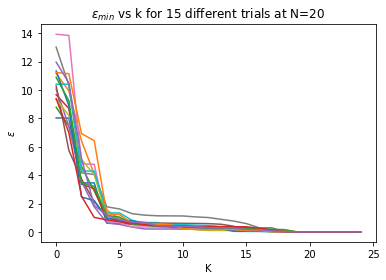

In [18]:
for x in range(15):
    plt.plot(K_list_new,min_energy_vs_K(20))
    plt.xlabel('K')
    plt.ylabel('$\epsilon$')
    plt.title('$\epsilon_{min}$ vs k for 15 different trials at N=20')

The minimum energy per data point varies a bit when K is small, but converges to 0 when K is large. (why?)

What happens to this variability as N gets larger?

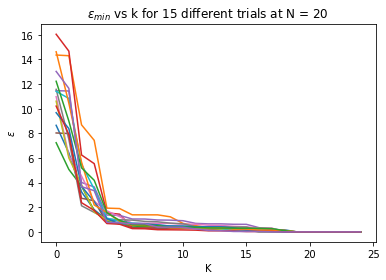

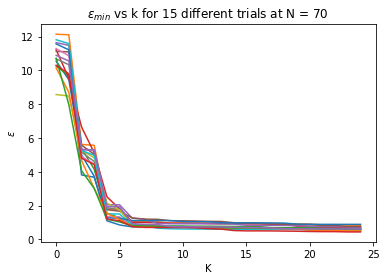

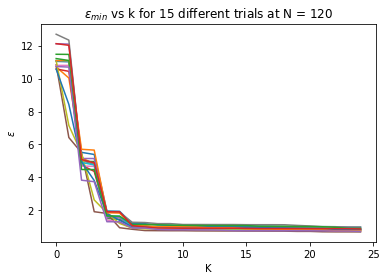

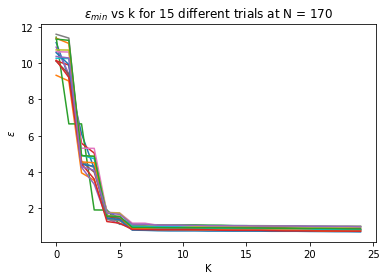

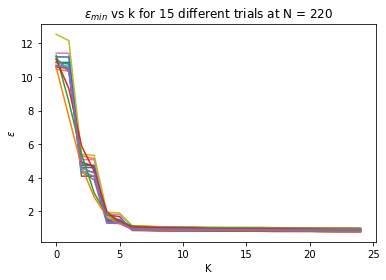

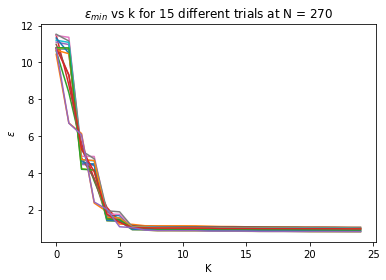

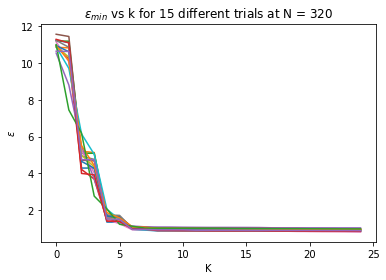

In [25]:
for N in range(20,350,50):
    plt.figure()
    for x in range(15):
        plt.xlabel('K')
        plt.ylabel('$\epsilon$')
        plt.title('$\epsilon_{min}$ vs k for 15 different trials at N = '+str(N))
        plt.plot(K_list_new,min_energy_vs_K(N))

As can be seen in the plots above, this variability at at low K decreases as N increases. 

The most important thing to verify is that minimizing the code length really does control the complexity of the fit, selecting a nontrivial optimum K. Convince yourself that, as in Fig. 6.41, the optimal K is smaller than $K_{true}$ for small data seta and approaches $K_{true}$ as you analyze larger datasets. 

In [26]:
#so, should average over 500 examples, and look at which value of K code length is at a minimum 

In [42]:
def min_energy_vs_K_return_codelen(N):
    #going to run this function 500 times, so each time we want to choose different parameters and test points 
    #starting K is still 10
    code_length_list = []
    chi_square_list = []
    epsilon_list = []
    
    coeff_K_10_new = [np.random.uniform(-1,1)*.0001 for _ in range(11)]
    x_vals_new = [np.random.uniform(-5,5) for _ in range(N)]
    x_vals_new = np.sort(x_vals_new)
    fx_vals_new = np.polyval(coeff_K_10_new,x_vals_new)
    var_noise_new = np.var(fx_vals_new) *(0.1)
    y_vals_new = [(fx_vals_new[i] + np.random.normal(loc=0,scale=np.sqrt(var_noise_new))) for i in range(len(fx_vals_new))]
    for K_val in range(25):
        p_K= np.polyfit(x_vals_new,y_vals_new,K_val)
        f_x_K = np.polyval(p_K,x_vals_new)
        code_length_list.append(code_length(N,K_val,y_vals_new,f_x_K,var_noise_new))
        chi_square_list.append(calc_chi_square(y_vals_new,f_x_K,var_noise_new))
        epsilon_list.append(calc_chi_square(y_vals_new,f_x_K,var_noise_new)/N)
    return code_length_list,K_list_new

In [104]:
def find_min_k(N):
    code_lengths, Ks = min_energy_vs_K_return_codelen(N)
    min_cl = np.nanmin(code_lengths)
    min_k = Ks[code_lengths.index(min_cl)] 
    return min_k

In [113]:
avg_min_k_array = []
error_avg_min_k = []
xrange = np.logspace(0,np.log10(50000),num=50)



In [114]:
for N in xrange:
    N= np.int(np.ceil(N))
    print(N)
    min_k_array = [find_min_k(N) for _ in range(500)]
    mean_min_k = np.mean(min_k_array)
    std_min_k = np.std(min_k_array)
    avg_min_k_array.append(mean_min_k)
    error_avg_min_k.append(std_min_k)

1
2
2
2
3
4
4
5
6
8
10
12
15
18
23
28
35
43
54
67
83
104
129
161
201
250
312
389
485
604
754
940
1172
1461
1822
2272
2834
3534
4407
5496
6854
8547
10659
13292
16577
20672
25780
32150
40094
50000


(50,)


Text(0,0.5,'Optimal Order of Polynomial Fit')

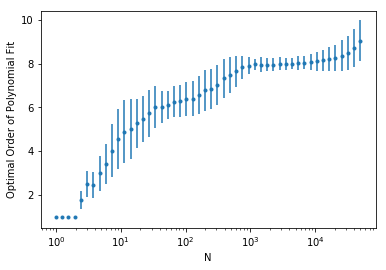

In [116]:
np.save('min_k',np.vstack((avg_min_k_array,error_avg_min_k)))
print(np.shape(avg_min_k_array))
plt.errorbar(xrange,avg_min_k_array, yerr = error_avg_min_k, ls='none')
plt.scatter(xrange,avg_min_k_array,marker= '.')
plt.xscale('log')
plt.xlabel('N')
plt.ylabel('Optimal Order of Polynomial Fit')